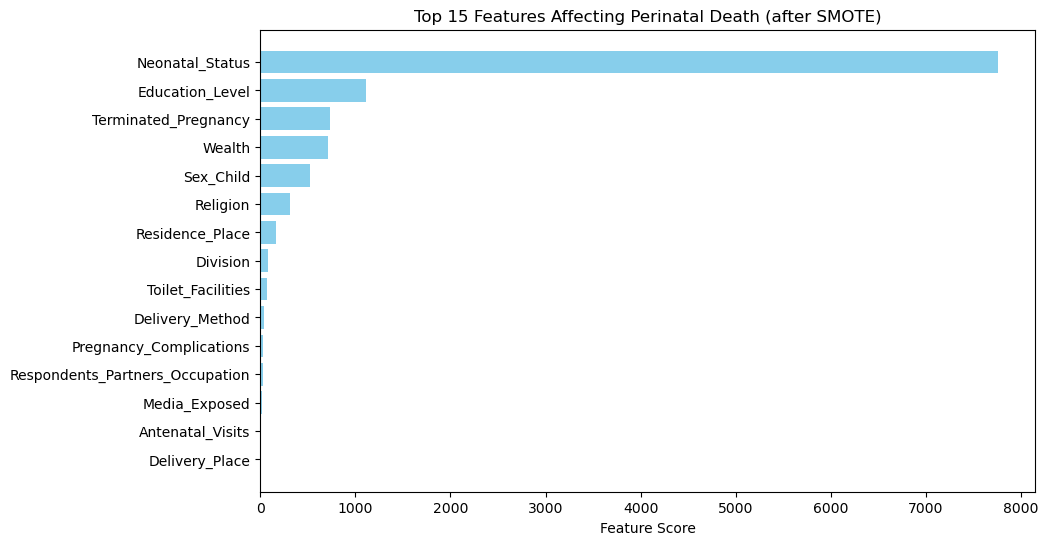

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest, f_classif
from imblearn.over_sampling import SMOTE

# Load your dataset
data = pd.read_csv("C:/Users/DELL/Documents/myNewDataSet/ProcessedData.csv")

# Separate features and target
X = data.drop(columns=["Perinatal_Death"])
y = data["Perinatal_Death"]

# Initialize SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)

# Apply SMOTE to your dataset
X_resampled, y_resampled = smote.fit_resample(X, y)

# Initialize SelectKBest with the desired number of features (K)
k_best = SelectKBest(score_func=f_classif, k='all')

# Fit SelectKBest on your resampled data
k_best.fit(X_resampled, y_resampled)

# Get the feature scores
feature_scores = k_best.scores_

# Get the names of the features
feature_names = X.columns

# Create a DataFrame to store feature names and their scores
feature_scores_df = pd.DataFrame({'Feature': feature_names, 'Score': feature_scores})

# Sort features by score in descending order
feature_scores_df = feature_scores_df.sort_values(by='Score', ascending=False)

# Plot the scores of the top K features (e.g., top 10)
top_k = 15  # Change this to the desired number of top features
plt.figure(figsize=(10, 6))
plt.barh(feature_scores_df['Feature'][:top_k], feature_scores_df['Score'][:top_k], color='skyblue')
plt.xlabel('Feature Score')
plt.title(f'Top {top_k} Features Affecting Perinatal Death (after SMOTE)')
plt.gca().invert_yaxis()  # Invert the y-axis to show the most important features at the top
plt.show()